<a href="https://colab.research.google.com/github/SUMANADITHYA/ML_projects/blob/main/classification_project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Project - Chronic Disease prediction

In [175]:
import numpy as np
import pandas as pd


In [176]:
df_data = pd.read_csv('/content/kidney_disease.csv')

In [151]:
df_data.shape

(400, 26)

In [152]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [153]:
df_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [177]:
df_data.drop('id', axis=1, inplace=True)

In [180]:
df_data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [178]:
df_data.columns = [
    'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells',
    'pus_cells', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea',
    'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume',
    'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus',
    'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class'
]

In [179]:
df_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cells,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [182]:
txt_columns = ['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
for col in txt_columns:
    df_data[col] = pd.to_numeric(df_data[col], errors='coerce')


converting the datavariable object to float

In [183]:
def convert_text_to_numeric(df_data, column):
  df_data[column] = pd.to_numeric(df_data[column], errors = 'coerce')

for i in txt_coloumns:
  convert_text_to_numeric(df_data, i)
  print(f"{i}: {df_data[i].dtype}")

packed_cell_volume: float64
white_blood_cell_count: float64
red_blood_cell_count: float64


handling the missing values

In [184]:
missing = df_data.isnull().sum()
missing[missing > 0].sort_values(ascending = False).head(20)

,0
red_blood_cells,152
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
pus_cells,65
hemoglobin,52
sugar,49
specific_gravity,47


In [162]:
df_data.columns()

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cells', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

creating an array for numeric colums and category columns

In [185]:
# num_cols = [col for col in df_data.columns if df_data[col].dtype != 'object']

# for col_name in num_cols:
#   mean_value_imputation( df_data, col_name)

# cat_cols = [col for col in df_data.columns if df_data[col].dtype == 'object']
num_cols = df_data.select_dtypes(include=['number']).columns
df_data[num_cols] = df_data[num_cols].fillna(df_data[num_cols].mean())

In [186]:
# cat_cols = [col for col in df_data.columns if df_data[col].dtype == 'object']

# for col_name in cat_cols:
#   mode_value_imputation( df_data, col_name)
cat_cols = df_data.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_data[col] = df_data[col].fillna(df_data[col].mode()[0])

In [187]:
missing = df_data.isnull().sum()
missing[missing >0].sort_values(ascending = False).head(20)

,0


In [166]:
df_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cells,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


check categories

In [188]:
print(f"diabbetes_mellitus: {df_data['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease: {df_data['coronary_artery_disease'].unique()}")
print(f"class: {df_data['class'].unique()}")

diabbetes_mellitus: ['yes' 'no' ' yes' '\tno' '\tyes']
coronary_artery_disease: ['no' 'yes' '\tno']
class: ['ckd' 'ckd\t' 'notckd']


replace the unwanted categories

In [189]:

replacement_dict = {
    'diabetes_mellitus': {' yes': 'yes', '\tno': 'no', '\tyes': 'yes'},
    'coronary_artery_disease': {'\tno': 'no'},
    'class': {'ckd\t': 'ckd', 'notckd': 'not ckd'}
}
for col, replacements in replacement_dict.items():
    df_data[col] = df_data[col].replace(replacements, regex=True)

In [190]:
print(f"diabbetes_mellitus: {df_data['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease: {df_data['coronary_artery_disease'].unique()}")
print(f"class : {df_data['class'].unique()}")

diabbetes_mellitus: ['yes' 'no']
coronary_artery_disease: ['no' 'yes']
class : ['ckd' 'not ckd']


Feature Encoding

In [191]:
df_data['class'] = df_data['class'].map({'ckd': 1, 'not ckd': 0})
df_data['red_blood_cells'] = df_data['red_blood_cells'].map({'normal': 1, 'abnormal': 0}).fillna(0)
df_data['pus_cells'] = df_data['pus_cells'].map({'normal': 1, 'abnormal': 0}).fillna(0)
df_data['pus_cell_clumps'] = df_data['pus_cell_clumps'].map({'present': 1, 'notpresent': 0}).fillna(0)
df_data['bacteria'] = df_data['bacteria'].map({'present': 1, 'notpresent': 0}).fillna(0)
df_data['hypertension'] = df_data['hypertension'].map({'yes': 1, 'no': 0}).fillna(0)
df_data['diabetes_mellitus'] = df_data['diabetes_mellitus'].map({'yes': 1, 'no': 0}).fillna(0)
df_data['coronary_artery_disease'] = df_data['coronary_artery_disease'].map({'yes': 1, 'no': 0}).fillna(0)
df_data['appetite'] = df_data['appetite'].map({'good': 1, 'poor': 0}).fillna(0)
df_data['pedal_edema'] = df_data['pedal_edema'].map({'yes': 1, 'no': 0}).fillna(0)
df_data['anemia'] = df_data['anemia'].map({'yes': 1, 'no': 0}).fillna(0)

In [192]:
df_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cells,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


Finding Correlation

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns


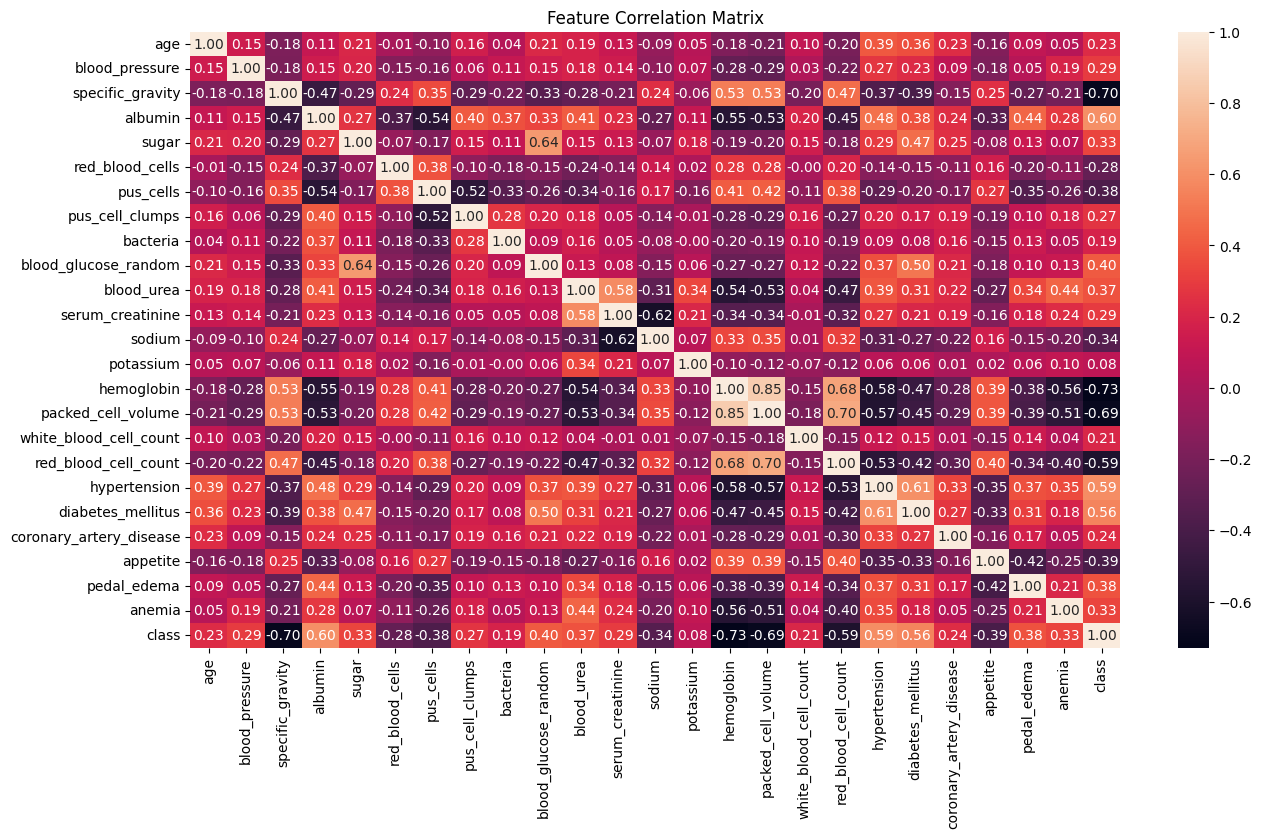

In [195]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_data.corr(), annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [196]:
target_corr = df_data.corr()['class'].abs().sort_values(ascending=False)
print(target_corr)

class                      1.000000
hemoglobin                 0.729628
specific_gravity           0.698957
packed_cell_volume         0.690060
albumin                    0.599238
red_blood_cell_count       0.590913
hypertension               0.590438
diabetes_mellitus          0.559060
blood_glucose_random       0.401374
appetite                   0.393341
pus_cells                  0.375154
pedal_edema                0.375154
blood_urea                 0.372033
sodium                     0.342288
sugar                      0.327812
anemia                     0.325396
serum_creatinine           0.294079
blood_pressure             0.290600
red_blood_cells            0.282642
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.225405
white_blood_cell_count     0.205274
bacteria                   0.186871
potassium                  0.076921
Name: class, dtype: float64


model building

In [198]:
df_data['class'].value_counts()

,count
class,
1,250
0,150


training and test dataset

In [199]:
from sklearn.model_selection import train_test_split

In [201]:
x = df_data.drop('class', axis=1)
y = df_data['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=25)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
# print(f"y_train shape: {y_train.shape}")

x_train shape: (300, 24)
x_test shape: (100, 24)


Implementing algorithm

In [203]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
dct.fit(x_train, y_train)


DecisionTreeClassifier()

In [205]:
y_pred_dct = dct.predict(x_test)
y_pred_dct

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1])

implement another algorithms

In [206]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



In [209]:
models = []
models.append(('Naive_Bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=8)))
models.append(('SVC', SVC(kernel = 'linear')))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))

In [210]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [212]:
for name, model in models:
  print(name, model)
  print()
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print('confusion_matrix: ',confusion_matrix(y_test, y_pred))
  print('\n')
  print('accuracy_score: ',accuracy_score(y_test, y_pred))
  print('\n')
  print('f1_score: ',f1_score(y_test, y_pred))
  print('\n')
  print('precision_score: ',precision_score(y_test, y_pred))
  print('\n')
  print('recall_score: ',recall_score(y_test, y_pred))
  print('\n')


Naive_Bayes GaussianNB()

confusion_matrix:  [[37  0]
 [ 5 58]]


accuracy_score:  0.95


f1_score:  0.9586776859504132


precision_score:  1.0


recall_score:  0.9206349206349206


KNN KNeighborsClassifier(n_neighbors=8)

confusion_matrix:  [[31  6]
 [18 45]]


accuracy_score:  0.76


f1_score:  0.7894736842105263


precision_score:  0.8823529411764706


recall_score:  0.7142857142857143


SVC SVC(kernel='linear')

confusion_matrix:  [[34  3]
 [ 2 61]]


accuracy_score:  0.95


f1_score:  0.9606299212598425


precision_score:  0.953125


recall_score:  0.9682539682539683


RandomForestClassifier RandomForestClassifier()

confusion_matrix:  [[35  2]
 [ 0 63]]


accuracy_score:  0.98


f1_score:  0.984375


precision_score:  0.9692307692307692


recall_score:  1.0


DecisionTreeClassifier DecisionTreeClassifier()

confusion_matrix:  [[35  2]
 [ 1 62]]


accuracy_score:  0.97


f1_score:  0.9763779527559056


precision_score:  0.96875


recall_score:  0.9841269841269841


